<center> <h1> <span style="color:black"> IABE Data Science Certificate - Module 1 - Computer lab 4  </h1> </center> 
<center> <h2> <span style="color:red"> Programming : Neural Networks </h1> </center>

# Agenda

* [Chapter 1 - Getting started](#one)
    + [1.1 Libraries](#one-one)
    + [1.2 Data](#one-two)
    + [1.3 Tensors](#one-three)


* [Chapter 2 - Fitting a GLM with a Neural Network](#two)
    + [2.1 A GLM with only an intercept](#two-one)
    + [2.2 A binomial Neural Network](#two-two)
    + [2.3 Including exposure](#two-three)
    + [2.4 Adding covariates](#two-four)
    
    
* [Chapter 3 - Deep Neural Networks](#three)
    + [3.1 Hidden layers](#three-one)
    + [3.2 CANN - Combined Actuarial Neural Network](#three-two)

# Chapter 1 - Getting started <a name="one"></a>

## 1.1 Libraries <a name="one-one"></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 1.2 MTPL data <a name="one-two"></a>

We will (once again) use the Motor Third Party Liability data set. There are 163,231 policyholders in this data set.

The frequency of claiming ( nclaims ) and corresponding severity ( avg , the amount paid on average per claim reported by a
policyholder) are the target variables in this data set.

Predictor variables are:
* the exposure-to-risk, the duration of the insurance coverage (max. 1 year)
* factor variables, e.g. gender, coverage, fuel
* continuous, numeric variables, e.g. age of the policyholder, age of the car
* spatial information: postal code (in Belgium) of the municipality where the policyholder resides.  

More details in [Henckaerts et al. (2018, Scandinavian Actuarial Journal)](https://katrienantonio.github.io/projects/2019/06/13/machine-learning/#data-driven) and [Henckaerts et al. (2019, arxiv)](https://katrienantonio.github.io/projects/2019/06/13/machine-learning/#tree-based-pricing).

In [ ]:
# load data using separator to correctly parse from .txt
df = pd.read_csv("https://katrienantonio.github.io/hands-on-machine-learning-R-module-1/data/PC_data.txt", sep=r"\s+")

In [ ]:
# column names to smaller case
df.columns = map(str.lower, df.columns)

In [ ]:
# rename exp to expo
df.rename(columns={'exp':'expo'}, inplace = True); df.head()

,id,nclaims,amount,avg,expo,coverage,fuel,use,fleet,sex,ageph,bm,agec,power,pc,town,long,lat
0,1,1,1618.001036,1618.001036,1.000000,TPL,gasoline,private,N,male,50,5,12,77,1000,BRUSSEL,4.355223,50.845386
1,2,0,0.000000,NaN,1.000000,PO,gasoline,private,N,female,64,5,3,66,1000,BRUSSEL,4.355223,50.845386
2,3,0,0.000000,NaN,1.000000,TPL,diesel,private,N,male,60,0,10,70,1000,BRUSSEL,4.355223,50.845386
3,4,0,0.000000,NaN,1.000000,TPL,gasoline,private,N,male,77,0,15,57,1000,BRUSSEL,4.355223,50.845386
4,5,1,155.974606,155.974606,0.046575,TPL,gasoline,private,N,female,28,9,7,70,1000,BRUSSEL,4.355223,50.845386


In [ ]:
# train/test split using sklearn
train, test = train_test_split(df, test_size=0.25); print(f'train size:{train.shape}, test size:{test.shape}')

train size:(122423, 18), test size:(40808, 18)


In [ ]:
# Reshuffling of the training observations
train = train.sample(frac = 1); print(f'train size:{train.shape}')

train size:(122423, 18)


## 1.3 Tensors <a name="one-three"></a>

**TensorFlow** is an end-to-end open source platform for machine learning. It has a comprehensive, flexible ecosystem of tools, libraries and community resources that lets researchers push the state-of-the-art in ML and developers easily build and deploy ML powered applications.

**Keras** is a high-level neural networks library that is running on the top of TensorFlow. Using Keras in deep learning allows for easy and fast prototyping as well as running seamlessly on CPU and GPU. This framework is written in Python code which is easy to debug and allows ease for extensibility.

In a big data world with structured and unstructured data, our input can be:
* a single time series: 1-dimensional, with 1 axis
* one sound fragment: 2-dimensional, with 2 axes
* one image in color: 3-dimensional, with 3 axes
* one movie: 4-dimensional, with 4 axes

We require a framework that can flexibly adjust to all these data structures!

TensorFlow is this flexible framework which consists of highly optimized functions based on tensors. What is a tensor?
* **1-dimensional tensor** is a vector (e.g. closing daily stock price during 250 days)
<img src="https://github.com/loremarchi/hands-on-machine-learning-R-module-3-python/blob/main/imgs/tensor1.png?raw=1" alt="tensor1" style="width: 300px;"/>
* **2-dimensional tensor** is a matrix (e.g. a tabular data set with observations and features)
<img src="https://github.com/loremarchi/hands-on-machine-learning-R-module-3-python/blob/main/imgs/tensor2.png?raw=1" alt="tensor2" style="width: 300px;"/>

* **3-dimensional tensor**, e.g. stock price dataset where one year of data can then be stored in a 3D tensor **(samples, timesteps, features)**, here **(250, 390, 3)**
    * each minute we record the current price, lowest price and highest price
    * a trading day has 390 minutes and a trading year has 250 days.
<figure>
<img src="https://github.com/loremarchi/hands-on-machine-learning-R-module-3-python/blob/main/imgs/tensor3.png?raw=1" alt="tensor3" style="width: 400px;"/>
<figcaption><center>Source: <a href="https://github.com/rstudio-conf-2020/dl-keras-tf">Bradley Boehmke</a>.<p></p></center></figcaption>
</figure>

* **4-dimensional tensor**, e.g. picture an image data set where
    * each image has a specific height and width
    * three color channels (Red, Green, Blue) are registered
    * a collection of images are stored in the structure **(samples, height, width, channels)**
<figure>
<img src="https://github.com/loremarchi/hands-on-machine-learning-R-module-3-python/blob/main/imgs/tensor4.png?raw=1" alt="tensor4" style="width: 400px;"/>
<figcaption><center>Source: <a href="https://github.com/rstudio-conf-2020/dl-keras-tf">Bradley Boehmke</a>.<p></p></center></figcaption>
</figure>

* **5-dimensional tensor**, e.g. Let's picture an video data set where
    * each video sample is one minute long and has anumber of frames per second (e.g. 4 frames persecond)
    * each frame has a specific height (e.g. 256 pixels) andwidth (e.g. 144 pixels)
    * three color channels (Red, Green, Blue)
    * multiple images ( samples ) are stored.
    * a collection of images can be stored in a 4D tensor(samples, frames, height, width, channels) whichbecomes here (samples, 240, 256, 144, 3) .
<figure>
<img src="https://github.com/loremarchi/hands-on-machine-learning-R-module-3-python/blob/main/imgs/tensor5.png?raw=1" alt="tensor5" style="width: 400px;"/>
<figcaption><center>Source: <a href="https://github.com/rstudio-conf-2020/dl-keras-tf">Bradley Boehmke</a>.<p></p></center></figcaption>
</figure>

In [ ]:
# create 2D tensor (3x2) with custom values
x = tf.constant([1,2,3,4,5,6], shape = [3,2], dtype=tf.float32); x

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 2.],
       [3., 4.],
       [5., 6.]], dtype=float32)>

In [ ]:
# create 2D tensor (2x2) with only unit values
ones = tf.ones(shape=[2,2], dtype=tf.float32); ones

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

In [ ]:
# column-wise mean
tf.math.reduce_mean(x, axis = 0)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([3., 4.], dtype=float32)>

In [ ]:
# row-wise mean
tf.math.reduce_mean(x, axis = 1)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1.5, 3.5, 5.5], dtype=float32)>

**Note that** Object x is also numpy-compatible, so it is possible to calculate the mean using _np.mean_. _tf.reduce_mean_ is multi-threaded, typically calculated on your GPU. _np.mean_ is calculated on a single CPU.

In [ ]:
# row-wise mean
np.mean(x, axis = 1)

array([1.5, 3.5, 5.5], dtype=float32)

In [ ]:
# column-wise mean
np.mean(x, axis = 0)

array([3., 4.], dtype=float32)

In [ ]:
# general matrix mean
np.mean(x)

3.5

**Question 1:** Create a 3-dimensional tensor with values 1,...,12 and shape (2,3,2)

In [ ]:
x = tf.constant([i+1 for i in range(12)], shape=(2,3,2), dtype = tf.float32); x

<tf.Tensor: shape=(2, 3, 2), dtype=float32, numpy=
array([[[ 1.,  2.],
        [ 3.,  4.],
        [ 5.,  6.]],

       [[ 7.,  8.],
        [ 9., 10.],
        [11., 12.]]], dtype=float32)>

**Question 2:** Calculate the logarithm

In [ ]:
log_x = tf.math.log(x); log_x

<tf.Tensor: shape=(2, 3, 2), dtype=float32, numpy=
array([[[0.       , 0.6931472],
        [1.0986123, 1.3862944],
        [1.609438 , 1.7917595]],

       [[1.9459102, 2.0794415],
        [2.1972246, 2.3025851],
        [2.3978953, 2.4849067]]], dtype=float32)>

**Question 3:** Calculate the mean over the last axis

In [ ]:
mean_x_ax3 = tf.math.reduce_mean(x, axis = 2); mean_x_ax3

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.5,  3.5,  5.5],
       [ 7.5,  9.5, 11.5]], dtype=float32)>

# Chapter 2 - Fitting a GLM with a Neural Network <a name="two"></a>

In a neural network:
* input travels through a **sequence** of layers, and gets transformed into the output
* layers in-between the input layer and the output layer are called hidden layers

<img src="https://github.com/loremarchi/hands-on-machine-learning-R-module-3-python/blob/main/imgs/nn_6.png?raw=1" 
align="center"/>

Claim frequency is usually modelled via GLM with log-link function:

$$
\begin{align}
Y \sim Poisson(\lambda = \exp(x'\beta))
\end{align}
$$

We now redefine this model as a neural network:

<img src="https://github.com/loremarchi/hands-on-machine-learning-R-module-3-python/blob/main/imgs/glm_vs_nn.jpg?raw=1" 
align="center"/>

There are no hidden nodes in a GLM, the output is directly connected to the input!

## 2.1 A GLM with only an intercept <a name="two-one"></a>

Consider the simplest case of a Poisson GLM with only an intercept:

$$
\begin{align}
Y \sim Poisson(\lambda = \exp(1\cdot\beta))
\end{align}
$$

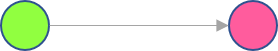

Let's fit a neural network with the following parametrization:
* There is one input node (intercept, constant one)
* There is one output node (number of claims)
* There is one connection from the input to the output node
* There are no hidden layers

Keras and TensorFlow 2.0 provide three methods to implement your own neural network architectures:

* Sequential API
* Functional API
* Model subclassing

**tf.keras.models.Sequential()** starts the specification of a new Neural Network using the sequential API

In [ ]:
# instantiate the Neural Network
nn_freq_intercept = tf.keras.models.Sequential()

Sequentially add new layers using **add()**

```python
nn_freq_intercept.add(tf.keras.layers.Dense(units = 1,
                                activation = 'exponential',
                                input_shape = (1,),
                                use_bias = False)) 
```

There are different types of layers. **Dense layers** connect each node from the previous layer to each node of the current layer.

* **units = 1**: number of nodes in the given layer
* **activation = 'exponential'**: at the end of this layer, apply the exponential function to all nodes
* **input_shape = (1,)**: the input layer is not explicitely specified, instead we specify the number of nodes in the input layer as an argument in the second layer of the neural network
* **use_bias = False**: by default the neural network adds an intercept - called bias - to the computation of each node. We do not need this bias term here, as we explictely include the intercept as the input node.

In [ ]:
# neural network structure - adding first layer (Dense-type, fully connected)
nn_freq_intercept.add(tf.keras.layers.Dense(units = 1,
                                activation = 'exponential', 
                                input_shape = (1,),
                                use_bias = False))

**QUESTION:** how many parameters does this model have?

In [ ]:
# answer
nn_freq_intercept.count_params()

1

In [ ]:
# summary of the structure of the neural netweork
nn_freq_intercept.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 1         
                                                                 
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


Once the architecture is finished, we compile the model and specify the loss function

* optimizer: algorithm used to calibrate the model.
* loss: loss function to minimize. 

For Poisson regression, we specify **loss = 'poisson'**.



In [ ]:
nn_freq_intercept.compile(optimizer = 'RMSprop', loss = 'poisson', metrics = [tf.keras.metrics.MeanSquaredError()])

In [ ]:
# create input/output vectors
input_intercept = np.ones(train.shape[0])
counts = np.array(train['nclaims'])
print(f'size of input vector: {input_intercept.shape[0]}, size of counts vector: {counts.shape[0]}')

size of input vector: 122423, size of counts vector: 122423


The **fit()** method shows the following parametrization:
* **x = input_intercept**: input_intercept contains the values of the nodes in the input layer.
* **y = counts**: use the claim counts as target.
* **epochs = 20**: perform 20 training iterations over the complete data.
* **batch_size = 1024**: use batches with 1024 observations to update weights.
* **validation_split = 0**: don't use a validation set, so all observations are used for training.
* **verbose = 0**: silence keras such that no output is generated during fitting.


In [ ]:
# fit the neural netword
nn_freq_intercept.fit(x = input_intercept,
                      y = counts,
                      epochs = 30,
                      batch_size = 1024,
                      validation_split = 0,
                      verbose = 0)

In [ ]:
# get_weights()
float(nn_freq_intercept.get_weights()[0])

-2.086961507797241

In [ ]:
# prepare test data
input_intercept_test = np.ones(test.shape[0])
counts_test = np.array(test['nclaims'])
exposure_test = np.array(test['expo'])

In [ ]:
# evaluate the model on the test data using `evaluate`
print(f'size of input vector: {input_intercept_test.shape[0]}, size of counts vector: {counts_test.shape[0]}')
results = nn_freq_intercept.evaluate(input_intercept_test, counts_test, verbose=0)
print("test Poisson loss, test MSE:", results)

size of input vector: 40808, size of counts vector: 40808
test Poisson loss, test MSE: [0.3801775872707367, 0.1318729668855667]


**Note**: This is the average loss per observation. The total loss is obtained by multiplying the average loss per observation by the total number of observations.

We compare the results of our neural network with the same model specified as a GLM:

In [ ]:
glm_freq_intercept = sm.formula.glm("nclaims ~ 1", data=train, family=sm.families.Poisson()).fit(); glm_freq_intercept.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                nclaims   No. Observations:               122423
Model:                            GLM   Df Residuals:                   122422
Model Family:                 Poisson   Df Model:                            0
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -48071.
Date:                Wed, 01 Dec 2021   Deviance:                       67783.
Time:                        09:32:27   Pearson chi2:                 1.34e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.0843      0.008   -257.212      0.000      -2.100      -2.068
==============================================================================
"""

To compare the in-sample deviance of the neural network and the GLM, we have to manually compute the deviance of the neural network:





$$
\begin{align}
\mathcal{D}= 2 \cdot \sum_{i}{Y_i \cdot \log\left(\frac{Y_i}{\mu_i}\right) - (Y_i - \mu_i)},
\end{align}
$$
where $\log\left(\frac{Y_i}{\mu_i}\right)$ is set to zero when $Y_i = 0$.

In [ ]:
mu = nn_freq_intercept.predict(input_intercept)[:,0]

In [ ]:
# deviance residuals of poisson neural regression
mu = nn_freq_intercept.predict(input_intercept)[:,0]  # [:,0] selects the predictions for the first output node
log_ratio = np.where(counts == 0, 0, np.log(counts / mu))

deviance_nn = 2 * sum(counts * log_ratio - (counts - mu))

deviance_nn

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


67782.80905417354

In [ ]:
# comparing the estimated parameter (difference reflects a different optimization technique)
print(f'NN weights:{np.float(nn_freq_intercept.get_weights()[0])}, \nGLM coefficients:{np.float(glm_freq_intercept.params)}')

NN weights:-2.086961507797241, 
GLM coefficients:-2.0843464224020307


## 2.2 Your Turn! <a name="two-two"></a>

**QUESTION 1:** adapt this code to replicate a **binomial** GLM with a **logit link function**. Add **accuracy** as a metric in your model. Consider the following hint:
* _Hint 1:_ the sigmoid activation function is the inverse of the logit link function.
* _Hint 2:_ the binary_crossentropy loss maximizes the loglikelihood of Bernoulli outcomes:
$$
\begin{align}
\sum^{n}_{i=1}{(y_{i}\cdot log(p_{i})+(1-y_{i})\cdot log(1-p_{i})).}
\end{align}
$$

In [ ]:
# setting up neural network
exercize_nn = tf.keras.models.Sequential()
exercize_nn.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid', input_shape = (1,), use_bias = False))
exercize_nn.compile(optimizer = 'RMSprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

**QUESTION 2:** fit your neural network.

In [ ]:
exercize_nn.fit(x = input_intercept,
                y = counts > 0, 
                epochs = 40, 
                batch_size = 1024, 
                validation_split = 0, 
                verbose = 1)

Epoch 1/40
120/120 [==============================] - 0s 342us/step - loss: 0.4945 - accuracy: 0.8879
Epoch 2/40
120/120 [==============================] - 0s 292us/step - loss: 0.4684 - accuracy: 0.8879
Epoch 3/40
120/120 [==============================] - 0s 383us/step - loss: 0.4454 - accuracy: 0.8879
Epoch 4/40
120/120 [==============================] - 0s 383us/step - loss: 0.4254 - accuracy: 0.8879
Epoch 5/40
120/120 [==============================] - 0s 308us/step - loss: 0.4083 - accuracy: 0.8879
Epoch 6/40
120/120 [==============================] - 0s 317us/step - loss: 0.3936 - accuracy: 0.8879
Epoch 7/40
120/120 [==============================] - 0s 300us/step - loss: 0.3815 - accuracy: 0.8879
Epoch 8/40
120/120 [==============================] - 0s 317us/step - loss: 0.3717 - accuracy: 0.8879
Epoch 9/40
120/120 [==============================] - 0s 308us/step - loss: 0.3641 - accuracy: 0.8879
Epoch 10/40
120/120 [==============================] - 0s 317us/step - loss: 0.358

**QUESTION 3:** compare your fitted neural network with a GLM.
* _Hint 1:_ to accomodate the fitting of the logistic regression of a categorical vector, we create a binary proxy variable nclaims_proxy with the following characteristics:
    * proxy = 0 when x = 0
    * proxy = 1 when x > 0

In [ ]:
train['nclaims_proxy'] = np.where(train['nclaims'] > 0, 1, 0)

In [ ]:
exercize_glm = sm.formula.glm("nclaims_proxy ~ 1 + 1", # it must be fitted this way or 0/1 labels get switched
                            data=train, 
                            family=sm.families.Binomial(sm.families.links.logit())).fit();

print(f'NN weights:{np.float(exercize_nn.get_weights()[0])}, \nGLM coefficients:{np.float(exercize_glm.params)}')

NN weights:-2.0677490234375, 
GLM coefficients:-2.069600609448125


C:\Users\u0149060\Anaconda3\envs\dev_env\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


In [ ]:
# reproducibility test
# NN weights:-2.0633275508880615, 
# GLM coefficients:-2.0620717063272846

In [ ]:
exercize_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          nclaims_proxy   No. Observations:               122423
Model:                            GLM   Df Residuals:                   122422
Model Family:                Binomial   Df Model:                            0
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -42953.
Date:                Wed, 01 Dec 2021   Deviance:                       85906.
Time:                        10:06:20   Pearson chi2:                 1.22e+05
No. Iterations:                     5   Pseudo R-squ. (CS):          1.110e-16
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.0696      0.009   -228.444      0.000      -2.087      -2.052
==============================================================================
"""

In [ ]:
exercize_nn.predict(input_intercept).min()

0.11227116

In [ ]:
# vector of fitted values
exercize_glm.predict()

array([0.11208678, 0.11208678, 0.11208678, ..., 0.11208678, 0.11208678,
       0.11208678])

In [ ]:
# Q3: compare prediction
np.unique(np.round(exercize_glm.predict(),5))

array([0.11209])

In [ ]:
# pretty much similar
np.unique(np.round(exercize_nn.predict(x = input_intercept),5))

array([0.11227], dtype=float32)

In [ ]:
# we can now delete the proxy variable from the dataset
train = train.drop('nclaims_proxy',1)

C:\Users\u0149060\Anaconda3\envs\dev_env\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


## 2.3 Taking exposure into account in a neural network <a name="two-three"></a>

$$
\begin{align}
Y \sim Poisson(\lambda = expo \cdot \exp(1\cdot\beta))
\end{align}
$$

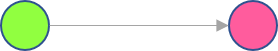

The Poisson loss function, including exposure, is:
$$
\begin{align}
\mathcal{L}=\sum_{i}{expo_{i}\cdot \lambda_{i}-y_{i}\cdot log(expo_{i}\cdot \lambda_{i})},
\end{align}
$$
which is proportional to:
$$
\begin{align}
\mathcal{L}=\sum_{i}{expo_{i}\cdot (\lambda_{i}-\frac{y_{i}}{expo_{i}}log(\lambda_{i}))}.
\end{align}
$$

This is the loss of a Poisson model with:
* observations $\frac{y_{i}}{expo_{i}}$ and
* weights $expo_{i}$

Notice indeed how the parameter estimates of the following two GLMs are identical.

a) Including **expo** as an offset

In [ ]:
# GLM with offset
glm_offset = sm.formula.glm("nclaims ~ 1", 
                            data=train, 
                            offset = np.log(train.expo),
                            family=sm.families.Poisson()).fit(); 
glm_offset.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                nclaims   No. Observations:               122423
Model:                            GLM   Df Residuals:                   122422
Model Family:                 Poisson   Df Model:                            0
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -47759.
Date:                Wed, 01 Dec 2021   Deviance:                       67234.
Time:                        10:06:28   Pearson chi2:                 1.48e+05
No. Iterations:                     6   Pseudo R-squ. (CS):              0.000
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9734      0.008   -242.868      0.000      -1.989      -1.957
==============================================================================
"""

b) Including **expo** as weights

In [ ]:
# GLM including weights
train['claims_per_expo'] = train.nclaims / train.expo

glm_weights = sm.formula.glm("claims_per_expo ~ 1", 
                             data=train, 
                             freq_weights = train.expo, 
                             family=sm.families.Poisson()).fit(); 
glm_weights.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        claims_per_expo   No. Observations:               122423
Model:                            GLM   Df Residuals:                108979.41
Model Family:                 Poisson   Df Model:                            0
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -47033.
Date:                Wed, 01 Dec 2021   Deviance:                       67234.
Time:                        10:06:30   Pearson chi2:                 1.48e+05
No. Iterations:                     6   Pseudo R-squ. (CS):         -4.441e-16
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9734      0.008   -242.868      0.000      -1.989      -1.957
==============================================================================
"""

We use the weight argument to also include exposure in our Neural Networks.

In [ ]:
# neural network architecture specification
nn_freq_exposure = tf.keras.models.Sequential()
nn_freq_exposure.add(tf.keras.layers.Dense(units = 1, activation = 'exponential', input_shape = (1,), use_bias = False))
nn_freq_exposure.compile(optimizer = 'RMSprop', loss = 'poisson')

Remark that the archetecture of our Neural Network remains the same

In [ ]:
# create a vector with exposure values
exposure = np.array(train['expo']) # pd.Series must be converted to pd.array due to compatibility reasons with fit() method

In [ ]:
# divide claim counts by exposure and use weights
nn_freq_exposure.fit(x = input_intercept,
                     y = counts/exposure,
                     sample_weight = exposure,
                     epochs = 20,
                     batch_size = 1024,
                     validation_split = 0,
                     verbose = 0)

In [ ]:
# get_weights()
float(nn_freq_exposure.get_weights()[0])

-1.9487924575805664

In [ ]:
# comparing the estimated parameter (difference reflects a different optimization technique)
print(f'NN weights:{nn_freq_exposure.get_weights()[0][0][0]}, \n\nGLM_offset coefficients:{glm_offset.params}, \n\nGLM_weights coefficients:{glm_weights.params}')

NN weights:-1.9487924575805664, 

GLM_offset coefficients:Intercept   -1.973366
dtype: float64, 

GLM_weights coefficients:Intercept   -1.973366
dtype: float64


## 2.4 Adding covariates <a name="two-four"></a>

$$
\begin{align}
Y \sim Poisson(\lambda = expo \cdot \exp(\beta_0 + ageph \cdot \beta))
\end{align}
$$

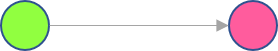

We now fit a frequency model with:
* An intercept
* A single covariate age

In [ ]:
# create a vector with ageph (pd.Series must be converted to pd.array due to compatibility reasons with fit() method)
ageph = np.array(train['ageph'])

In [ ]:
# neural network architecture specification
nn_freq_ageph = tf.keras.models.Sequential()
nn_freq_ageph.add(tf.keras.layers.Dense(units = 1, activation = 'exponential', input_shape = (1,), use_bias = True)) # Notice how we set use_bias = TRUE for the intercept.
nn_freq_ageph.compile(optimizer = 'RMSprop', loss = 'poisson')

In [ ]:
nn_freq_ageph.fit(ageph, # ageph is now our input
                 counts/exposure,
                 sample_weight = exposure,
                 epochs = 20,
                 batch_size = 1024,
                 validation_split = 0,
                 verbose = 0)

In [ ]:
nn_freq_ageph.get_weights()

[array([[-0.02477216]], dtype=float32), array([-0.8522962], dtype=float32)]

Compare with GLM

In [ ]:
glm_age = sm.formula.glm("nclaims ~ ageph", 
                            data=train, 
                            offset = np.log(train.expo),
                            family=sm.families.Poisson()).fit(); 
glm_age.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                nclaims   No. Observations:               122423
Model:                            GLM   Df Residuals:                   122421
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -47362.
Date:                Wed, 01 Dec 2021   Deviance:                       66439.
Time:                        10:06:47   Pearson chi2:                 1.46e+05
No. Iterations:                     6   Pseudo R-squ. (CS):           0.006478
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2481      0.026    -47.098      0.000      -1.300      -1.196
ageph         -0.0159      0.001    -27.713      0.000      -0.017      -0.015
==============================================================================
"""

If the Neural Network and the GLM do not agree, you should let the Neural Network run for some more epochs. The GLM is much more efficient at fitting GLMs.

# Chapter 3 - Deep Neural Networks <a name="three"></a>

## 3.1 Hidden layers <a name="three-one"></a>

Time to go beyond the GLM case and include hidden layers in our Neural Network

In [ ]:
# neural network architecture specification
nn_freq_ageph = tf.keras.models.Sequential()
nn_freq_ageph.add(tf.keras.layers.BatchNormalization(input_shape = (1,))) # layer_batch_normalization centers and scales the input features
nn_freq_ageph.add(tf.keras.layers.Dense(units = 5, activation = 'relu')) # Hidden layer with 5 nodes and relu activation function
nn_freq_ageph.add(tf.keras.layers.Dense(units = 1, activation = 'exponential', use_bias = True)) 
nn_freq_ageph.compile(optimizer = 'RMSprop', loss = 'poisson', metrics = [tf.keras.metrics.MeanSquaredError()])

In [ ]:
nn_freq_ageph.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 1)                 4         
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 10        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 6         
Total params: 20
Trainable params: 18
Non-trainable params: 2
_________________________________________________________________


In [ ]:
nn_freq_ageph.fit(ageph,
                 counts/exposure,
                 sample_weight = exposure,
                 epochs = 40,
                 batch_size = 1024,
                 validation_split = 0,
                 verbose = 1)

Epoch 1/40
120/120 [==============================] - 0s 505us/step - loss: 0.6840 - mean_squared_error: 1.0618
Epoch 2/40
120/120 [==============================] - 0s 461us/step - loss: 0.4976 - mean_squared_error: 0.8168
Epoch 3/40
120/120 [==============================] - 0s 427us/step - loss: 0.4179 - mean_squared_error: 0.7399
Epoch 4/40
120/120 [==============================] - 0s 517us/step - loss: 0.3830 - mean_squared_error: 0.7150
Epoch 5/40
120/120 [==============================] - 0s 672us/step - loss: 0.3696 - mean_squared_error: 0.7093
Epoch 6/40
120/120 [==============================] - 0s 433us/step - loss: 0.3660 - mean_squared_error: 0.7080
Epoch 7/40
120/120 [==============================] - 0s 429us/step - loss: 0.3650 - mean_squared_error: 0.7075
Epoch 8/40
120/120 [==============================] - 0s 477us/step - loss: 0.3647 - mean_squared_error: 0.7073
Epoch 9/40
120/120 [==============================] - 0s 425us/step - loss: 0.3645 - mean_squared_error:

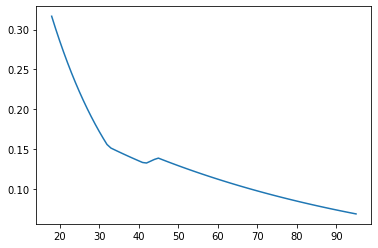

In [ ]:
# plotting
age = tf.cast(np.array(range(18,96)), tf.float32)
nn_pred = nn_freq_ageph.predict(age)
plt.plot(age, nn_pred)

## 3.2 CANN - Combined Actuarial Neural Network <a name="three-two"></a>

In [ ]:
# bin for train dataset
bins = [17, 22, 30, 40, 50, 60, 70, 80, 120]
train['ageph_binned'] = pd.cut(train['ageph'], bins = bins); print(train.ageph_binned.value_counts());

(40, 50]     29034
(30, 40]     27949
(50, 60]     21389
(22, 30]     16612
(60, 70]     16541
(70, 80]      8160
(17, 22]      1649
(80, 120]     1089
Name: ageph_binned, dtype: int64


In [ ]:
glm_age_binned = sm.formula.glm("nclaims ~ ageph_binned", 
                            data=train, 
                            offset = np.log(train.expo),
                            family=sm.families.Poisson()).fit(); 

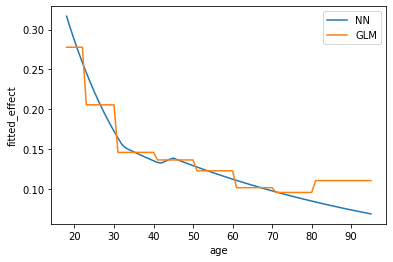

In [ ]:
# plotting
age_binned = pd.cut(np.array(range(18,96)), bins = bins);
glm_pred = glm_age_binned.predict(pd.DataFrame({'ageph_binned':age_binned}))

plt.plot(age, nn_pred, label = 'NN')
plt.plot(age, glm_pred, label = "GLM")
plt.xlabel('age')
plt.ylabel('fitted_effect')
plt.legend()
plt.show()

Now let's see how the two models perform on the test data:

In [ ]:
# bin for test dataset
bins = [17, 22, 30, 40, 50, 60, 70, 80, 120]
test['ageph_binned'] = pd.cut(test['ageph'], bins = bins); print(test.ageph_binned.value_counts());

(30, 40]     9647
(40, 50]     9592
(50, 60]     6876
(60, 70]     5510
(22, 30]     5505
(70, 80]     2764
(17, 22]      529
(80, 120]     385
Name: ageph_binned, dtype: int64


In [ ]:
# create a vector with ageph (pd.Series must be converted to pd.array due to compatibility reasons with fit() method)
ageph_test = np.array(test['ageph'])

In [ ]:
# predicting on test set using NN
nn_pred_on_test = nn_freq_ageph.predict(ageph_test)

In [ ]:
# predicting on test set using GLM
age_binned_test = pd.cut(ageph_test, bins = bins);
glm_pred_on_test = glm_age_binned.predict(pd.DataFrame({'ageph_binned':age_binned_test}))

In [ ]:
# evaluate performance of nn_freq_ageph on test data
nn_freq_ageph.evaluate(ageph_test, counts_test/exposure_test, sample_weight=exposure_test, verbose = 0)

1276/1276 [==============================] - 0s 283us/step - loss: 0.3651 - mean_squared_error: 1.6879


[0.3651430606842041, 1.6879297494888306]

The Neural Network fits a smooth age effect, but does not capture:
* The elevated risk for young drivers
* The increased risk at old ages

For simple problems, simple models and expert opinion is often better suited than Neural Networks. At the same time Neural Networks are very good at finding complex patterns and interactions in the data.

Can we combine the insides of a well understood actuarial model with the flexibility of a Neural Network: <a href='https://www.cambridge.org/core/journals/astin-bulletin-journal-of-the-iaa/article/editorial-yes-we-cann/66E8BEC373B5CCEF3BF3303D442D6B75' target='_blank'>Yes we CANN!</a>

Using a skip connection we immediately connect the output of our GLM model with the output of the Neural Network

<figure>
<img src="https://github.com/loremarchi/hands-on-machine-learning-R-module-3-python/blob/main/imgs/skip_conn.png?raw=1" alt="autoencoder_schema" style="width: 300px;"/>
<figcaption><center>Figure taken from <a href="https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3320525">Schelldorfer and Wuthrich (2019)</a>.<p></p></center></figcaption>
</figure>

The output node, without skip connection, calculates:
$$
\begin{align}
f_{activation}{(\sum_{i}w_{i}h_{i}+b)}.
\end{align}
$$

With a skip connection, this simply becomes, where s is the value of the skip connection:
$$
\begin{align}
f_{activation}{(\sum_{i}w_{i}h_{i}+b+s)}.
\end{align}
$$

We take a linear combination of the last hidden layer outputs and add the skip input, before applying the activation function.
So, what can we do with this? Let's take a claim frequency example with the exponential activation function:
* Adding exposure as an offset term:
$$
\begin{align}
output = \exp{(\sum_{i}w_{i}h_{i}+b+log(expo))} = expo\cdot \exp(\sum_{i}w_{i}h_{i}+b)
\end{align}
$$
* Adding a base prediction:
$$
\begin{align}
output = \exp{(\sum_{i}w_{i}h_{i}+b+log(base))} = base\cdot \exp(\sum_{i}w_{i}h_{i}+b)
\end{align}
$$
* The combination of both:
$$
\begin{align}
output = \exp{(\sum_{i}w_{i}h_{i}+b+log(expo\cdot base))} = expo\cdot base\cdot \exp(\sum_{i}w_{i}h_{i}+b)
\end{align}
$$

A skip connection allows us to guide the neural net in the right direction and to model adjustments on top of the base
predictions, for example obtained via a GLM or GAM. In the actuarial lingo this is called a Combined Actuarial Neural Network
(CANN).

For the implementation of this model, we have to leave the sequential API as there is no longer a single path from input to output

In [ ]:
# When using the procedural API, we have to explicitely define the input layers
# In this case, there are two input layers, one for the covariates and one for the skip connection.

input_nn = tf.keras.layers.Input(shape = (1,), name = 'nn')
input_skip = tf.keras.layers.Input(shape = (1,), name = 'skip')

In [ ]:
# Each layer is defined as a function of the previous layer in the network
norm_nn = tf.keras.layers.BatchNormalization()(input_nn)
dense_1 = tf.keras.layers.Dense(units = 16, activation = 'relu')(norm_nn)
# Notice we use a linear activation function. Only after combination with the skip connection we apply the exponential activation function
output_nn = tf.keras.layers.Dense(units = 1, activation = 'linear')(dense_1) 

In [ ]:
# Combine the output of the first part of the neural network with the skip connection via layer_add 
interm = tf.keras.layers.Add()([output_nn, input_skip])

Finally we want to apply the exponential function to the sum of output_nn and input_skip. We acthieve this by adding a dense layer with fixed weights one for both inputs and an exponential activation function. The model then computes:

$$
\begin{align}
output = \exp(1 \cdot \texttt{output_nn} + 1 \cdot \texttt{input_skip})
\end{align}
$$



In [ ]:
init = tf.constant_initializer(np.ones((1,1)))
output = tf.keras.layers.Dense(units = 1, 
                               activation = 'exponential', 
                               trainable = False,
                               kernel_initializer = init,
                               name = 'output')(interm)

In [ ]:
# Finally we compile the full model
cann = tf.keras.models.Model(inputs = [input_nn, input_skip], outputs = output)
cann.compile(optimizer = 'RMSprop', loss = 'poisson', metrics = [tf.keras.metrics.MeanSquaredError()])

Tensorflow is endowed with a specific utility to visualize the structure of the network. We can indeed see the skip connection via layer_add:

In [ ]:
# model structure
tf.keras.utils.plot_model(model=cann, show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [ ]:
skip_glm = glm_age_binned.predict(linear = True)

Collect the CANN input data in a named list:

In [ ]:
cann_input = {'nn':np.array(train['ageph']), 'skip':np.array(skip_glm)}

Fit the CANN like we have seen before:

In [ ]:
# we no longer include exposure as exposure is included via the skip connection
cann.fit(x = cann_input,
         y = counts,
         epochs = 40,
         batch_size = 1024,
         validation_split = 0,
         verbose = 1)

Epoch 1/40
120/120 [==============================] - 0s 511us/step - loss: 0.3780 - mean_squared_error: 0.1331
Epoch 2/40
120/120 [==============================] - 0s 502us/step - loss: 0.3780 - mean_squared_error: 0.1331
Epoch 3/40
120/120 [==============================] - 0s 509us/step - loss: 0.3780 - mean_squared_error: 0.1331
Epoch 4/40
120/120 [==============================] - 0s 500us/step - loss: 0.3780 - mean_squared_error: 0.1331
Epoch 5/40
120/120 [==============================] - 0s 508us/step - loss: 0.3780 - mean_squared_error: 0.1331
Epoch 6/40
120/120 [==============================] - 0s 542us/step - loss: 0.3780 - mean_squared_error: 0.1331
Epoch 7/40
120/120 [==============================] - 0s 523us/step - loss: 0.3780 - mean_squared_error: 0.1331
Epoch 8/40
120/120 [==============================] - 0s 517us/step - loss: 0.3780 - mean_squared_error: 0.1331
Epoch 9/40
120/120 [==============================] - 0s 526us/step - loss: 0.3780 - mean_squared_error:

In [ ]:
age = np.array(list(range(18,96)))
skip_zeros = np.zeros(age.shape[0])
age_skip_0 = pd.DataFrame({'ageph':age,
                           'skip':skip_zeros})
age_skip_0['cann'] = cann.predict(x={'nn':tf.cast(age_skip_0['ageph'], dtype = tf.float32),
                                     'skip':tf.cast(age_skip_0['skip'], dtype = tf.float32)})

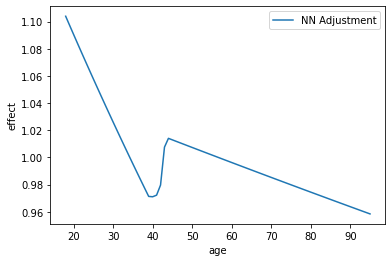

In [ ]:
plt.plot(age_skip_0.ageph, age_skip_0.cann, label = "NN Adjustment")
plt.xlabel('age')
plt.ylabel('effect')
plt.legend()
plt.show()

In [ ]:
df = pd.DataFrame({'ageph':np.array(range(18,96)),
                   'skip': np.log(glm_pred)})

df['cann'] = cann.predict(x={'nn':tf.cast(df.ageph, dtype = tf.float32), 
                             'skip':tf.cast(df.skip, dtype = tf.float32)}); df.head()

,ageph,skip,cann
0,18,-1.28079,0.306700
1,19,-1.28079,0.304836
2,20,-1.28079,0.302983
3,21,-1.28079,0.301142
4,22,-1.28079,0.299311


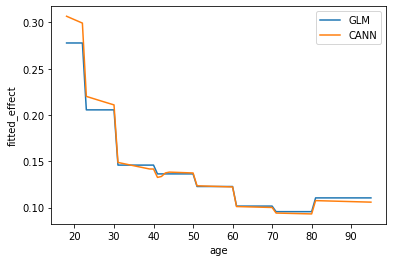

In [ ]:
# plotting
plt.plot(age, np.exp(df.skip), label = "GLM") # note that we transform the data via np.exp
plt.plot(age, df.cann, label = "CANN")
plt.xlabel('age')
plt.ylabel('fitted_effect')
plt.legend()
plt.show()

Evaluate our loss function (Poisson) on the test data set

In [ ]:
cann.evaluate([ageph_test, np.log(glm_pred_on_test)], counts_test, verbose=0)

40/40 [==============================] - 0s 400us/step - loss: 0.3816 - mean_squared_error: 0.1374


[0.3816250264644623, 0.1373864859342575]